# Clustering Agorithms

## **Data Analysis and Data Prep**

### Loading all the necessary packages

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [155]:
df = pd.read_csv('DiamondsPrices.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [157]:
df.shape

(53940, 10)

In [159]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [161]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [163]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [166]:
cut_map = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
color_map = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
clarity_map = {
    'I1': 1,
    'SI2': 2,
    'SI1': 3,
    'VS2': 4,
    'VS1': 5,
    'VVS2': 6,
    'VVS1': 7,
    'IF': 8
}

df['cut'] = df['cut'].map(cut_map)
df['color'] = df['color'].map(color_map)
df['clarity'] = df['clarity'].map(clarity_map)


In [168]:
features = ['carat', 'cut', 'color', 'clarity','depth', 'table', 'x', 'y', 'z']
df = df[features].dropna() 

In [170]:
df.shape

(53940, 9)

In [176]:
df

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,5,6,2,61.5,55.0,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,5.75,5.76,3.50
53936,0.72,2,7,3,63.1,55.0,5.69,5.75,3.61
53937,0.70,3,7,3,62.8,60.0,5.66,5.68,3.56
53938,0.86,4,3,2,61.0,58.0,6.15,6.12,3.74


In [178]:
# 4. 划分 dev/test (8000 each)，剩下是 train
x_temp, x_test = train_test_split(df, test_size=8000, random_state=42)
x_train, x_dev = train_test_split(x_temp, test_size=8000, random_state=42)

In [180]:

# 5. 标准化
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_dev_scaled = scaler.transform(x_dev)
x_test_scaled = scaler.transform(x_test)

In [182]:
x_test

,carat,cut,color,clarity,depth,table,x,y,z
1388,0.24,5,4,7,62.1,56.0,3.97,4.00,2.47
50052,0.58,3,5,6,60.0,57.0,5.44,5.42,3.26
41645,0.40,5,6,6,62.1,55.0,4.76,4.74,2.95
42377,0.43,4,6,6,60.8,57.0,4.92,4.89,2.98
17244,1.55,5,6,2,62.3,55.0,7.44,7.37,4.61
...,...,...,...,...,...,...,...,...,...
24528,1.64,4,5,3,61.3,58.0,7.65,7.59,4.67
15679,1.01,2,5,4,61.7,58.0,6.30,6.34,3.90
2624,0.90,2,4,3,57.7,62.0,6.29,6.23,3.61
16467,1.02,3,6,4,63.2,60.0,6.34,6.29,3.99


In [184]:
x_test_scaled

array([[-1.17499658,  0.97952525, -0.2370979 , ..., -1.56812992,
        -1.54408918, -1.50222074],
       [-0.45622646, -0.81376198,  0.3514969 , ..., -0.2557333 ,
        -0.27596507, -0.38840623],
       [-0.83675182,  0.97952525,  0.94009171, ..., -0.86282834,
        -0.88323577, -0.82547269],
       ...,
       [ 0.22026307, -1.7104056 , -0.2370979 , ...,  0.50313549,
         0.44740149,  0.10505589],
       [ 0.47394664, -0.81376198,  0.94009171, ...,  0.54777483,
         0.5009842 ,  0.64081477],
       [ 2.14403016, -0.81376198, -1.41428751, ...,  1.74410917,
         1.82269102,  1.83922278]])

In [31]:
# 6. 聚类（用 train 数据训练 KMeans）
kmeans = KMeans(n_clusters=3, random_state=1)
train_labels = kmeans.fit_predict(x_train_scaled)

In [33]:
# 7. 给 dev 和 test 打标签
dev_labels = kmeans.predict(x_dev_scaled)
test_labels = kmeans.predict(x_test_scaled)

In [35]:
# 8. 整理成带标签的数据
x_train['Cluster'] = train_labels
x_dev['Cluster'] = dev_labels
x_test['Cluster'] = test_labels



In [200]:
random_v=42

In [202]:
# try using a for loop
k = range(3,10)
K = []
WCSS = []
ss=[]
for i in k:
    kmodel = KMeans(n_clusters=i,n_init=20,  random_state=random_v).fit(x_train_scaled)
    wcss_score = kmodel.inertia_
    WCSS.append(wcss_score)
    sil_score = silhouette_score(x_train_scaled, kmodel.labels_)   

    K.append(i)
    ss.append(sil_score)

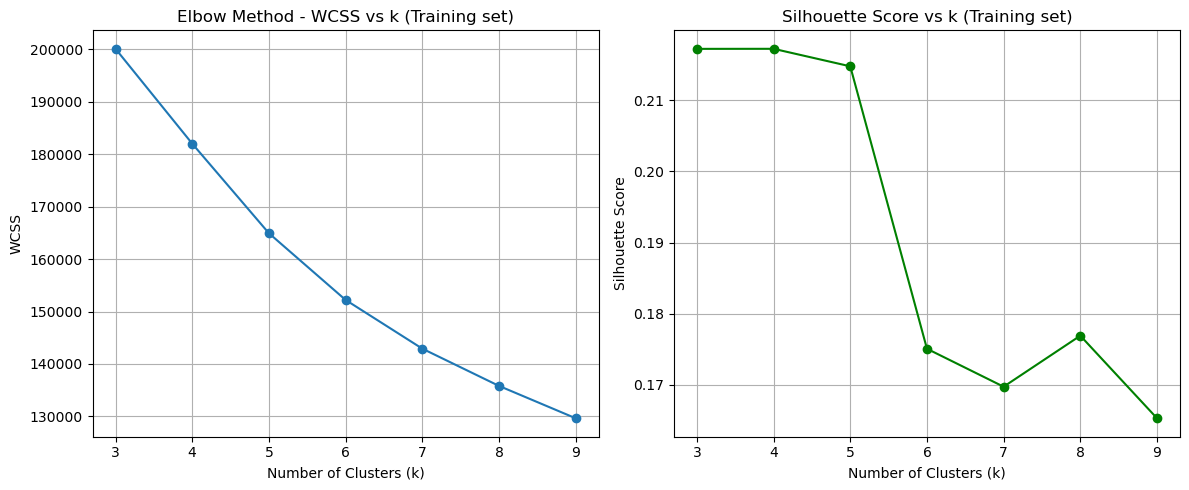

In [203]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, WCSS, marker='o')
plt.title('Elbow Method - WCSS vs k (Training set)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)

# Silhouette Plot
plt.subplot(1, 2, 2)
plt.plot(K, ss, marker='o', color='green')
plt.title('Silhouette Score vs k (Training set)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

In [204]:
# try using a for loop
k = range(3,10)
K = []
WCSS = []
ss=[]
for i in k:
    kmodel = KMeans(n_clusters=i,n_init=20,  random_state=random_v).fit(x_dev_scaled)
    wcss_score = kmodel.inertia_
    WCSS.append(wcss_score)
    sil_score = silhouette_score(x_dev_scaled, kmodel.labels_)    
    K.append(i)
    ss.append(sil_score)

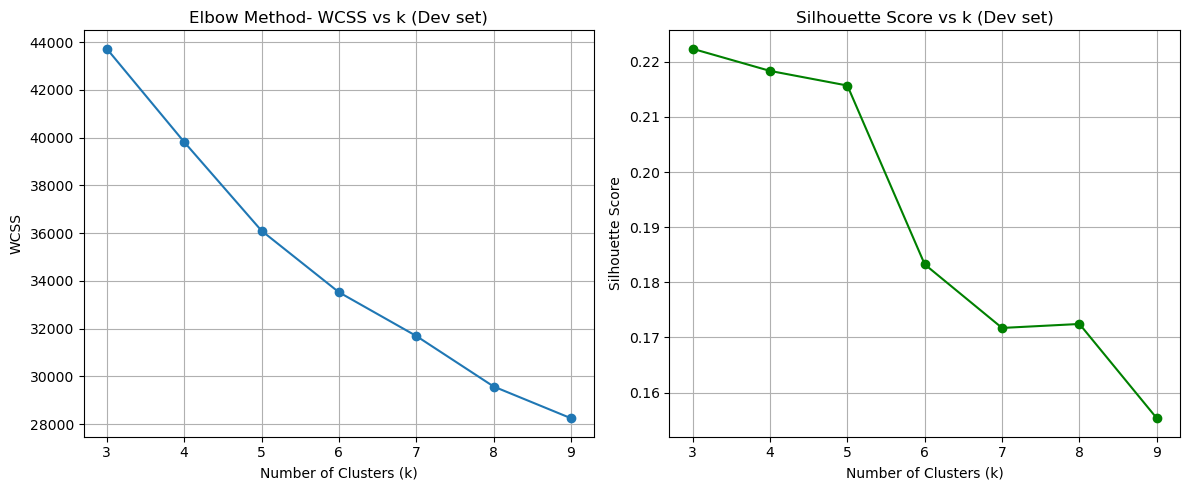

In [205]:
import matplotlib.pyplot as plt

# Elbow Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, WCSS, marker='o')
plt.title('Elbow Method- WCSS vs k (Dev set)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)

# Silhouette Plot
plt.subplot(1, 2, 2)
plt.plot(K, ss, marker='o', color='green')
plt.title('Silhouette Score vs k (Dev set)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

In [206]:
# try using a for loop
k = range(3,10)
K = []
WCSS = []
ss=[]
for i in k:
    kmodel = KMeans(n_clusters=i,n_init=20,  random_state=random_v).fit(x_test_scaled)
    wcss_score = kmodel.inertia_
    WCSS.append(wcss_score)
    sil_score = silhouette_score(x_test_scaled, kmodel.labels_)    
    K.append(i)
    ss.append(sil_score)

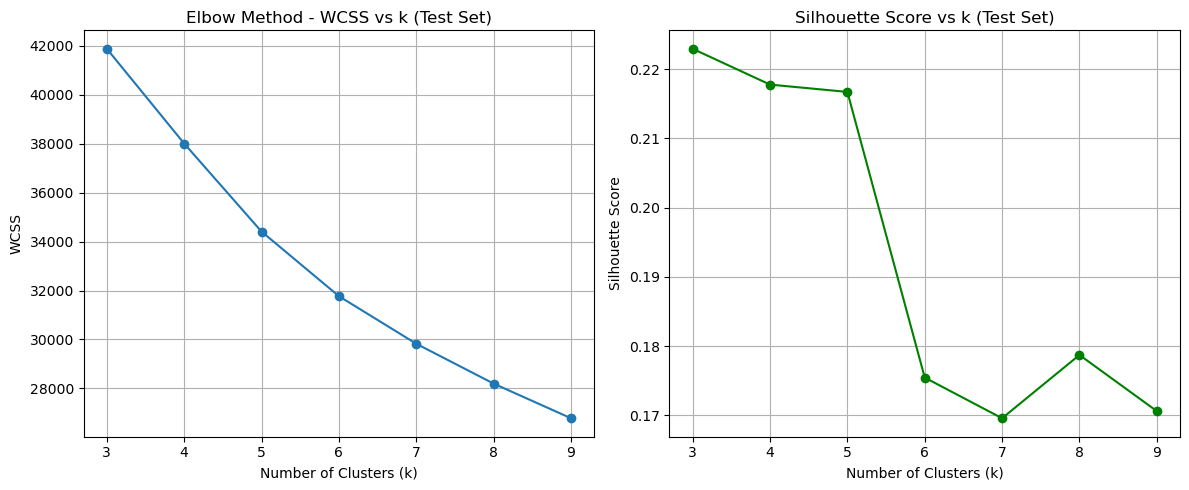

In [207]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, WCSS, marker='o')
plt.title('Elbow Method - WCSS vs k (Test Set)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)

# Silhouette Plot
plt.subplot(1, 2, 2)
plt.plot(K, ss, marker='o', color='green')
plt.title('Silhouette Score vs k (Test Set)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

In [214]:
x_all_scaled = scaler.fit_transform(df)
final_kmeans = KMeans(n_clusters=3,n_init=20, random_state=random_v)
df['cluster'] = kmeans.fit_predict(x_all_scaled)

In [216]:
from sklearn.metrics import silhouette_score

In [220]:
x=list(x_test_scaled[0])

In [222]:
x

[-1.1749965803620026,
 0.9795252477884235,
 -0.23709790146862914,
 1.781855278375958,
 0.24960996270639027,
 -0.6529905288542047,
 -1.5681299224348961,
 -1.5440891776358956,
 -1.5022207440212703]

In [224]:
c=kmeans.predict([x])

In [226]:
c

array([1])

In [120]:
c[0]

1

In [244]:
features = ['carat', 'cut', 'color', 'clarity','depth', 'table', 'x', 'y', 'z']
df = df[features].dropna() 
x_temp, x_test = train_test_split(df, test_size=8000, random_state=42)

# Split the temporary set into training and development sets
x_train, x_dev = train_test_split(x_temp, test_size=8000, random_state=42)

# Standardize the data (fit on training set only)
scaler = StandardScaler().fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_dev_scaled = scaler.transform(x_dev)
x_test_scaled = scaler.transform(x_test)

# Train the KMeans clustering model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42).fit(x_train_scaled)


In [247]:
train_score = silhouette_score(x_train_scaled, train_labels)
dev_score = silhouette_score(x_dev_scaled, dev_labels)
test_score = silhouette_score(x_test_scaled, test_labels)

print(f"Silhouette Score (Train): {train_score:.4f}")
print(f"Silhouette Score (Dev):   {dev_score:.4f}")
print(f"Silhouette Score (Test):  {test_score:.4f}")

Silhouette Score (Train): 0.2164
Silhouette Score (Dev):   0.2136
Silhouette Score (Test):  0.2187


In [248]:
x_test

,carat,cut,color,clarity,depth,table,x,y,z
1388,0.24,5,4,7,62.1,56.0,3.97,4.00,2.47
50052,0.58,3,5,6,60.0,57.0,5.44,5.42,3.26
41645,0.40,5,6,6,62.1,55.0,4.76,4.74,2.95
42377,0.43,4,6,6,60.8,57.0,4.92,4.89,2.98
17244,1.55,5,6,2,62.3,55.0,7.44,7.37,4.61
...,...,...,...,...,...,...,...,...,...
24528,1.64,4,5,3,61.3,58.0,7.65,7.59,4.67
15679,1.01,2,5,4,61.7,58.0,6.30,6.34,3.90
2624,0.90,2,4,3,57.7,62.0,6.29,6.23,3.61
16467,1.02,3,6,4,63.2,60.0,6.34,6.29,3.99


In [101]:
x_all_scaled.shape


(53940, 10)

In [255]:
df['cluster'] = kmeans.fit_predict(x_all_scaled)

In [257]:
df['cluster'].unique()

array([1, 0, 2])

In [259]:
df[df['cluster']==1].head(10)

,carat,cut,color,clarity,depth,table,x,y,z,cluster
0,0.23,5,6,2,61.5,55.0,3.95,3.98,2.43,1
1,0.21,4,6,3,59.8,61.0,3.89,3.84,2.31,1
2,0.23,2,6,5,56.9,65.0,4.05,4.07,2.31,1
3,0.29,4,2,4,62.4,58.0,4.20,4.23,2.63,1
4,0.31,2,1,2,63.3,58.0,4.34,4.35,2.75,1
5,0.24,3,1,6,62.8,57.0,3.94,3.96,2.48,1
6,0.24,3,2,7,62.3,57.0,3.95,3.98,2.47,1
7,0.26,3,3,3,61.9,55.0,4.07,4.11,2.53,1
8,0.22,1,6,4,65.1,61.0,3.87,3.78,2.49,1
9,0.23,3,3,5,59.4,61.0,4.00,4.05,2.39,1


In [261]:
df[df['cluster']==0].head(30)

,carat,cut,color,clarity,depth,table,x,y,z,cluster
90,0.70,5,6,3,62.5,57.0,5.70,5.72,3.57,0
91,0.86,1,6,2,55.1,69.0,6.45,6.33,3.52,0
93,0.71,3,6,4,62.4,57.0,5.68,5.73,3.56,0
94,0.78,3,4,2,63.8,56.0,5.81,5.85,3.72,0
95,0.70,2,6,4,57.5,58.0,5.85,5.90,3.38,0
96,0.70,2,5,5,59.4,62.0,5.71,5.76,3.40,0
97,0.96,1,5,2,66.3,62.0,6.27,5.95,4.07,0
98,0.73,3,6,3,61.6,59.0,5.77,5.78,3.56,0
99,0.80,4,3,3,61.5,58.0,5.97,5.93,3.66,0
100,0.75,3,7,3,63.2,56.0,5.80,5.75,3.65,0


In [263]:
df[df['cluster']==2].head(10)

,carat,cut,color,clarity,depth,table,x,y,z,cluster
172,1.17,3,1,1,60.2,61.0,6.83,6.90,4.13,2
247,1.05,3,1,2,63.2,56.0,6.49,6.45,4.09,2
284,1.00,4,2,2,58.2,60.0,6.61,6.55,3.83,2
324,1.00,4,1,2,62.3,58.0,6.45,6.34,3.98,2
366,0.93,4,1,2,61.9,57.0,6.21,6.19,3.84,2
460,0.90,5,1,4,62.8,55.0,6.20,6.16,3.88,2
525,1.17,4,1,1,60.2,61.0,6.90,6.83,4.13,2
580,0.90,3,1,3,63.4,54.0,6.17,6.14,3.90,2
653,1.01,5,2,1,61.5,57.0,6.45,6.46,3.97,2
659,1.27,4,3,2,59.3,61.0,7.12,7.05,4.20,2


In [251]:
x=scaler.transform([[1.50,1,3,1,65.6,54.0,7.26,7.09,4.70]])
r=kmeans.predict(x)

In [253]:
r[0]

2

In [190]:
x

array([[ 1.48868093, -2.60704921, -0.8256927 , -1.85522316,  2.69674478,
        -1.5472043 ,  1.36913871,  1.21542032,  1.64183793]])